<a href="https://colab.research.google.com/github/abhiramangit/CNN_Exercises/blob/master/MNIST_Problem_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch import optim


In [0]:
batc_size = 128

In [0]:
## Download MNIST dataset into colab storage 
train_set_download = torchvision.datasets.MNIST('./data',train=True,transform=transforms.ToTensor(),download=True)
train_set_loader = torch.utils.data.DataLoader(train_set_download,batch_size=batc_size,shuffle=True)
test_set_download = torchvision.datasets.MNIST('./data',train=False,transform=transforms.ToTensor(),download=True)
test_set_loader = torch.utils.data.DataLoader(test_set_download,batc_size,shuffle=False)

In [0]:
## Verifying Shape of single batch
data_iter = iter(train_set_loader)
inputs,labels = data_iter.next()
print(inputs.shape,labels.shape)
## Images are Single Channel (Black-White Images)

torch.Size([128, 1, 28, 28]) torch.Size([128])


In [0]:
classes = ["Zero","One","Two","Three","Four","Five","Six","Seven","Eight","Nine"]

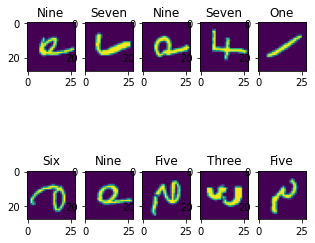

In [0]:
## Visualizing some Data 
def image_show(iter,fig,sample_size,img,labels,classes):
  img_to_numpy = img.numpy()
  img_to_numpy = img_to_numpy.transpose(2,1,0)
  fig.add_subplot(2,5,iter+1)
  plt.imshow(img_to_numpy[:,:,-1])
  plt.title(classes[labels[i].item()])
  #plt.show()

fig1 = plt.figure(figsize=(5,5))

sample_size = 10
for i in range(sample_size):
  few_sample_imgs = inputs[i]
  image_show(i,fig1,sample_size,few_sample_imgs,labels,classes)


In [5]:
## Add inputs & labels into GPU device 
print(torch.cuda.device_count())
device = torch.device('cuda:0' if torch.cuda.is_available else "cpu")
print(device)

1
cuda:0


In [0]:
images_in_gpu,labels_in_gpu = inputs.to(device),labels.to(device)


In [0]:
## CNN Model 
class MNIST_Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.CNN_network = nn.Sequential(
        nn.Conv2d(1,6,3,stride=1,padding=(1,1)),      ## (N,1,28,28) -> (N,6,28,28)
        nn.ReLU(),        ## (N,6,28,28)
        nn.AvgPool2d(2,2),      ## (N,6,14,14)
        nn.Conv2d(6,16,3),       ## (N,6,14,14) -> (N,16,12,12)
        nn.ReLU(),      ## (N,16,12,12)
        nn.AvgPool2d(2,2)       ##(N,16,6,6)    
    )
    self.fully_connected_layer = nn.Sequential(
        nn.Linear(576,256),
        nn.ReLU(),
        nn.Linear(256,120),
        nn.ReLU(),
        nn.Linear(120,10)
    )
  
  def forward(self,X):
    X_Cnn = self.CNN_network(X)
   # print(X_Cnn.shape )
    X_for_fc = X_Cnn.view(X_Cnn.shape[0],-1)
    #print(X_for_fc.shape)
    X_fc = self.fully_connected_layer(X_for_fc)
    #print(X_fc.shape)
    return X_fc


In [0]:
net = MNIST_Model().to(device)

In [0]:
def Evaluation(data_set_loader):

  correct,total = 0,0
  for batch_img_label in data_set_loader:
    img_inputs,labels = batch_img_label
    img_inputs,labels = img_inputs.to(device),labels.to(device)
    out_of_each_batch = net(img_inputs)     ## (N,10)
    _,pred_class = torch.max(out_of_each_batch,1)
    correct+=(pred_class==labels).sum().item()
    total+= out_of_each_batch.shape[0]
  #print("correct",correct)
  return (correct*100)/total

In [0]:
## Download MNIST dataset into colab storage 
train_set_download = torchvision.datasets.MNIST('./data',train=True,transform=transforms.ToTensor(),download=True)
train_set_loader = torch.utils.data.DataLoader(train_set_download,batch_size=batc_size,shuffle=True)
test_set_download = torchvision.datasets.MNIST('./data',train=False,transform=transforms.ToTensor(),download=True)
test_set_loader = torch.utils.data.DataLoader(test_set_download,batc_size,shuffle=False)

In [0]:
optim_fn = optim.Adam(net.parameters())
loss_fn = nn.CrossEntropyLoss()
epochs = 20

Epoch 0/20, Train_Accuracy: 94.52333333333333 & Test_Accuracy:94.61
Epoch 1/20, Train_Accuracy: 96.73166666666667 & Test_Accuracy:96.74
Epoch 2/20, Train_Accuracy: 97.57166666666667 & Test_Accuracy:97.6
Epoch 3/20, Train_Accuracy: 98.15833333333333 & Test_Accuracy:98.0
Epoch 4/20, Train_Accuracy: 98.46833333333333 & Test_Accuracy:98.31
Epoch 5/20, Train_Accuracy: 98.83666666666667 & Test_Accuracy:98.58
Epoch 6/20, Train_Accuracy: 98.805 & Test_Accuracy:98.48
Epoch 7/20, Train_Accuracy: 98.86666666666666 & Test_Accuracy:98.46
Epoch 8/20, Train_Accuracy: 99.11666666666666 & Test_Accuracy:98.6
Epoch 9/20, Train_Accuracy: 99.15333333333334 & Test_Accuracy:98.71
Epoch 10/20, Train_Accuracy: 99.21833333333333 & Test_Accuracy:98.71
Epoch 11/20, Train_Accuracy: 99.38 & Test_Accuracy:98.79
Epoch 12/20, Train_Accuracy: 99.485 & Test_Accuracy:98.67
Epoch 13/20, Train_Accuracy: 99.65333333333334 & Test_Accuracy:98.91
Epoch 14/20, Train_Accuracy: 99.69666666666667 & Test_Accuracy:98.93
Epoch 15/20,

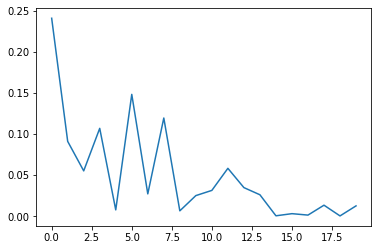

In [22]:
#def MNIST_data_Train(data_set_loader,model=None,epochs=100,loss_fn = None, optim_fn = None):
loss_arr_per_batch = [] 
loss_arr_per_epoch = []

for e_epoch in range(epochs):
  for i,inp_imgs in enumerate(train_set_loader):
    imgs,labels = inp_imgs
    imgs,labels = imgs.to(device),labels.to(device)

    ## Forward Pass for each batchsize
    outputs = net(imgs)
    ## Compute Loss
    loss = loss_fn(outputs,labels)
    ## Backward Pass
    loss.backward()
    ## Updating Gradients
    optim_fn.step()

    ## Resetting the Gradients
    optim_fn.zero_grad()

    loss_arr_per_batch.append(loss.item())
  
  loss_arr_per_epoch.append(loss.item())

  print("Epoch {}/{}, Train_Accuracy: {} & Test_Accuracy:{}".format(e_epoch,epochs,Evaluation(train_set_loader),Evaluation(test_set_loader)))

plt.plot(loss_arr_per_epoch)
plt.show()
  

In [0]:
def predict_classes(train_set_loader):
  for i,data in enumerate(train_set_loader):
    if i ==0:
      inputs,labels = data
      inputs,labels = inputs.to(device),labels.to(device)
      outputs = net(inputs)
      class_name = torch.max(outputs,dim=1)[1].to("cpu").numpy()
      class_name = [classes[val] for val in class_name]

      inputs = inputs.to("cpu")
    return class_name,inputs

In [0]:
def plot_image_and_class(batch_size,train_set_loader):
  rows = 16
  columns = batch_size/rows
  classes_names_pred , inputs_images = predict_classes(train_set_loader)
  fig = plt.figure(figsize=(50,50))
  fig.subplots_adjust(hspace=0.5,wspace=0.5)  
  
  for i,img in enumerate(inputs_images):
    img_transpose = img.numpy().transpose(2,1,0)
    img_modified = img_transpose[:,:,-1]
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(img_modified)
    plt.title(classes_names_pred[i],{'fontsize':16})
  plt.show()


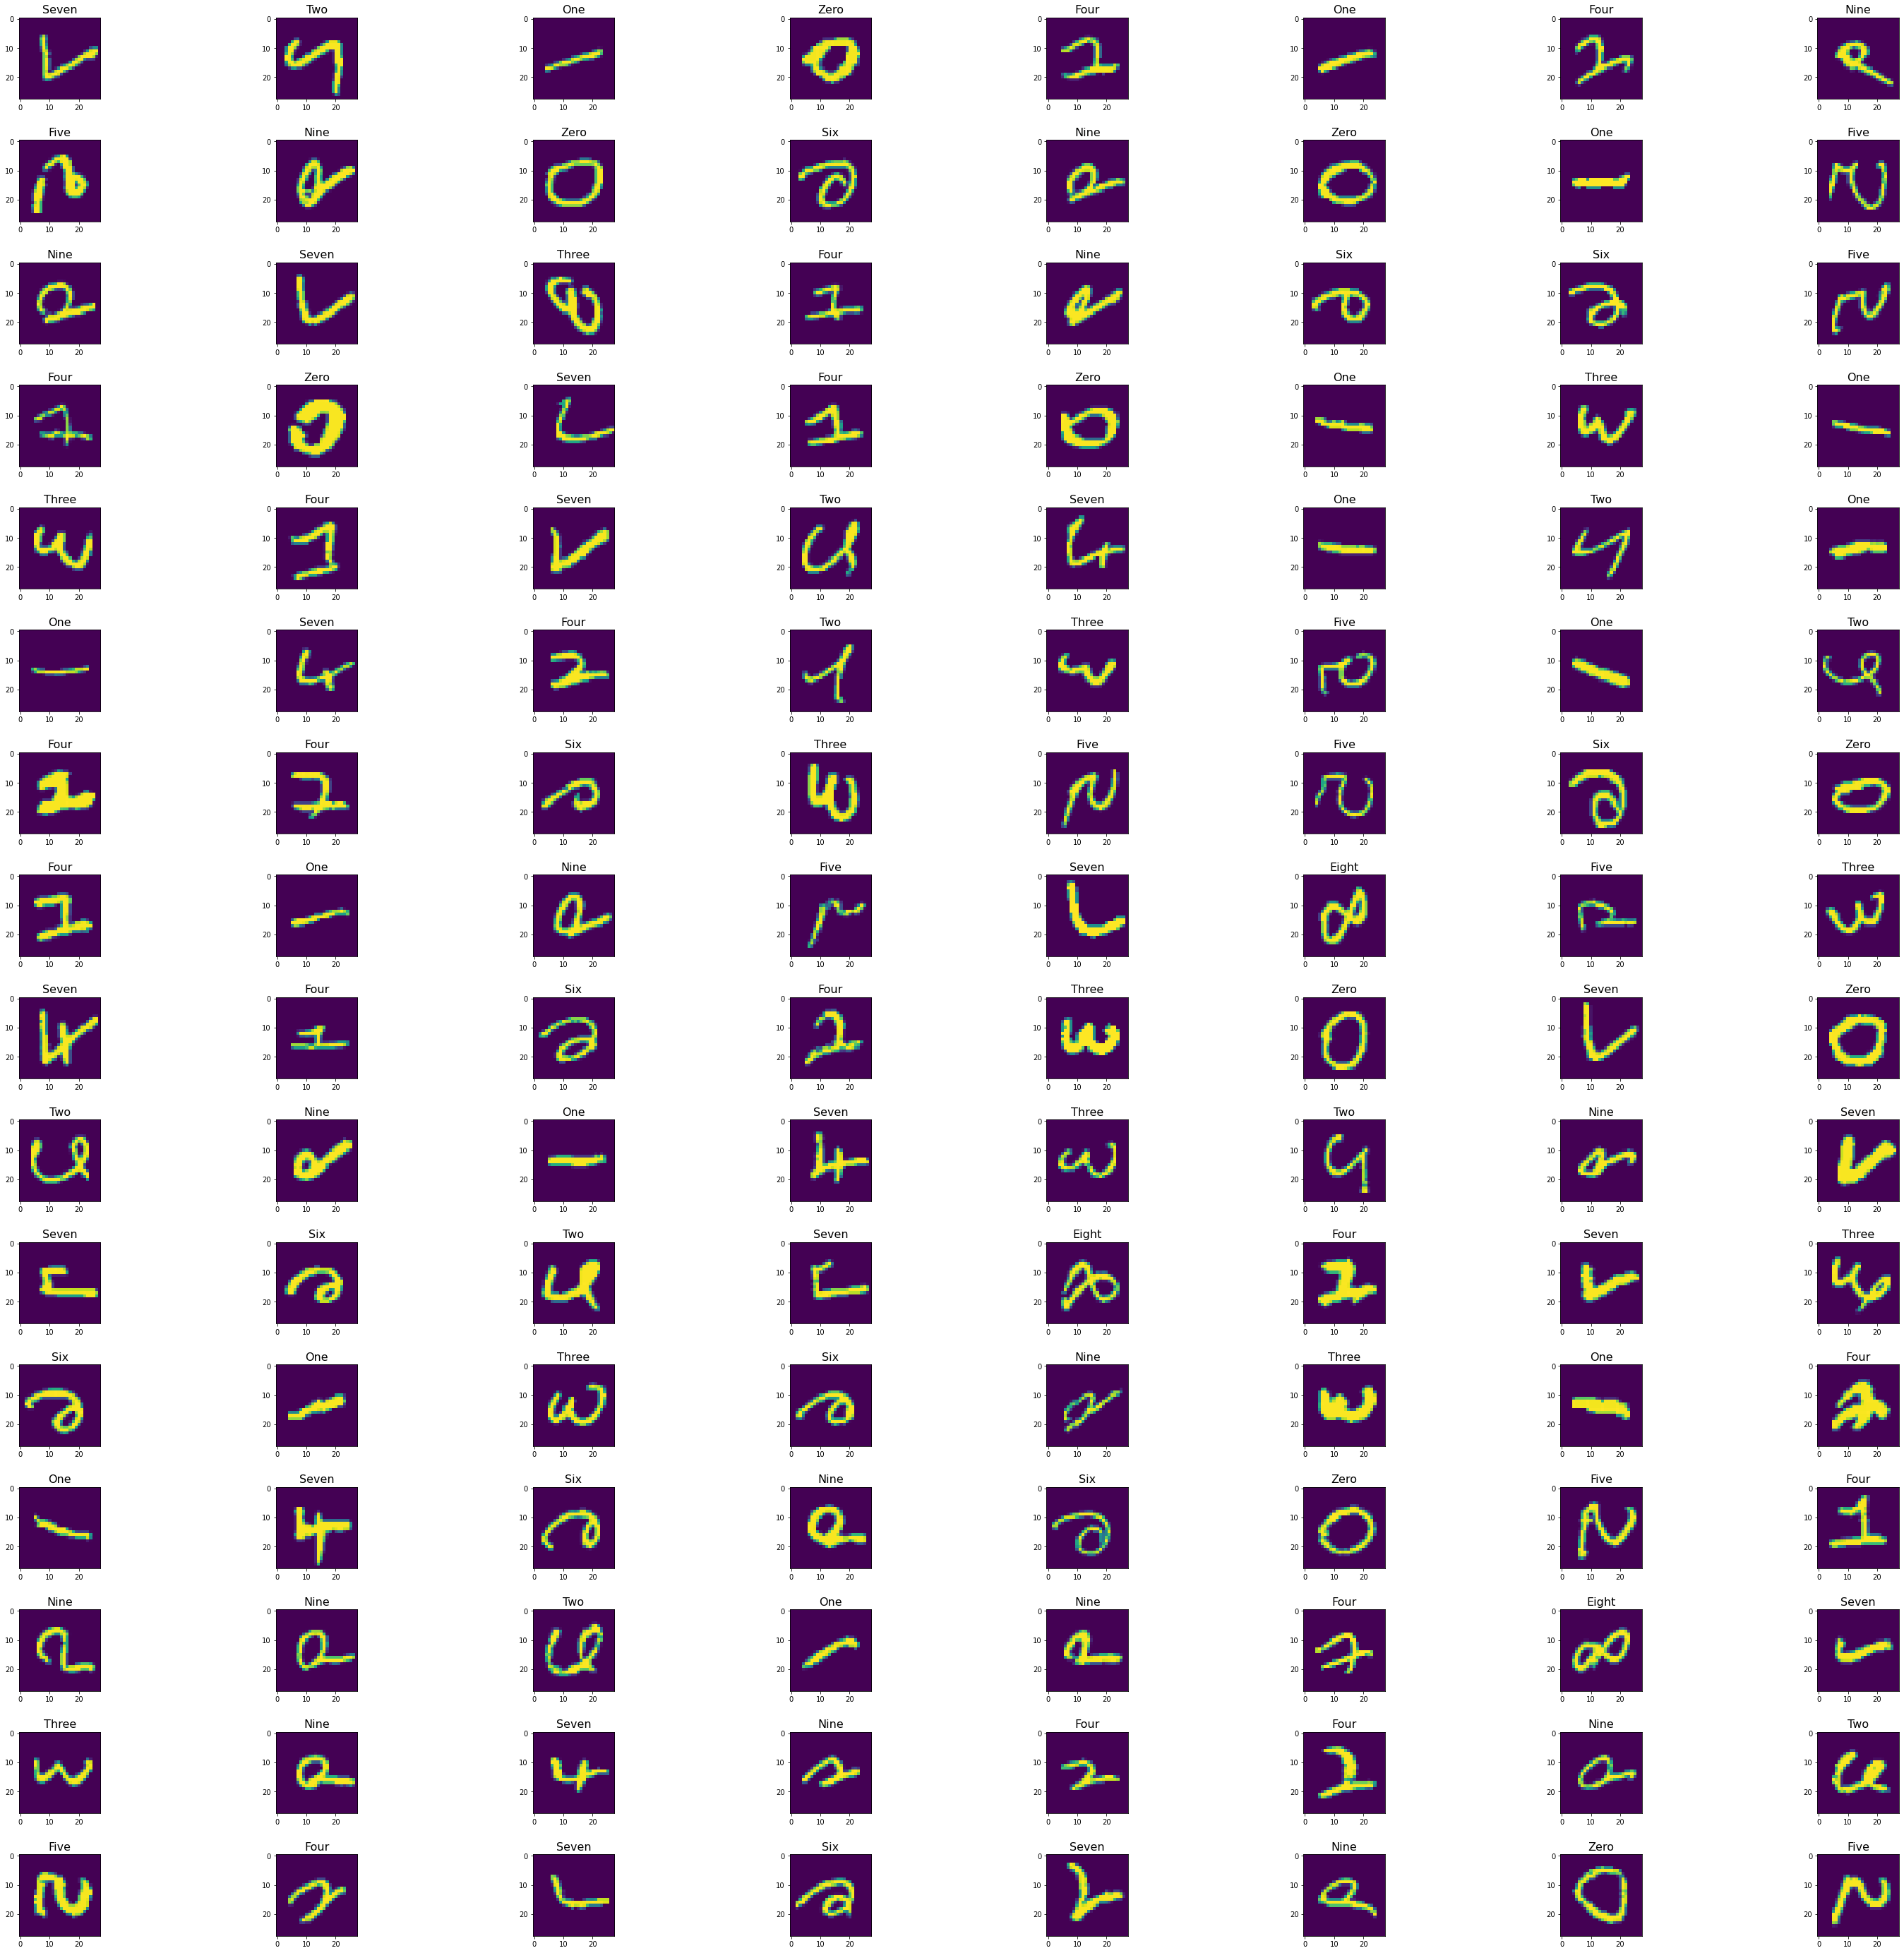

In [49]:
plot_image_and_class(batc_size,test_set_loader)